In [1]:
def uniform_cdf(x: float) -> float:
    """Returns the probability that a uniform random variable is <= x"""
    if x < 0:   return 0    # Uniform random is never less than 0
    elif x < 1: return x    # e.g. P(X <= 0.4) = 0.4
    else:       return 1    # Uniform random is always less than 1

In [2]:
import math

In [3]:
SQRT_TWO_PI = math.sqrt(2 * math.pi)

In [4]:
def normal_pdf(x: float, mu: float = 0, sigma: float = 1) -> float:
    return (math.exp(-(x - mu) ** 2 / 2 / sigma ** 2) / (SQRT_TWO_PI * sigma))

In [5]:
import matplotlib.pyplot as plt

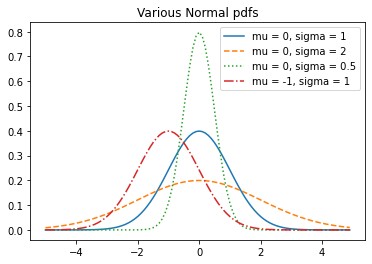

In [6]:
xs = [x / 10.0 for x in range(-50, 50)]
plt.plot(xs, [normal_pdf(x, sigma = 1) for x in xs], '-', label = 'mu = 0, sigma = 1')
plt.plot(xs, [normal_pdf(x, sigma = 2) for x in xs], '--', label = 'mu = 0, sigma = 2')
plt.plot(xs, [normal_pdf(x, sigma = 0.5) for x in xs], ':', label = 'mu = 0, sigma = 0.5')
plt.plot(xs, [normal_pdf(x, mu = -1)   for x in xs], '-.', label = 'mu = -1, sigma = 1')
plt.legend()
plt.title("Various Normal pdfs")
plt.show()

In [7]:
# plt.savefig('various_normal_pdfs.png')
plt.gca().clear()
plt.close()
plt.clf()

<Figure size 432x288 with 0 Axes>

In [8]:
def normal_cdf(x: float, mu: float = 0, sigma: float = 1) -> float:
    return (1 + math.erf((x - mu) / math.sqrt(2) / sigma)) / 2

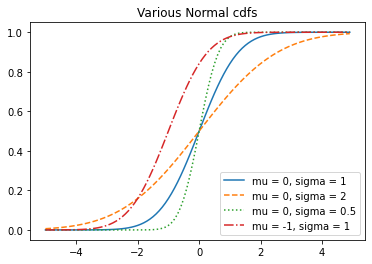

In [9]:
xs = [x / 10.0 for x in range(-50, 50)]
plt.plot(xs, [normal_cdf(x, sigma = 1) for x in xs], '-', label = 'mu = 0, sigma = 1')
plt.plot(xs, [normal_cdf(x, sigma = 2) for x in xs], '--', label = 'mu = 0, sigma = 2')
plt.plot(xs, [normal_cdf(x, sigma = 0.5) for x in xs], ':', label = 'mu = 0, sigma = 0.5')
plt.plot(xs, [normal_cdf(x, mu = -1) for x in xs], '-.', label = 'mu = -1, sigma = 1')
plt.legend(loc = 4) # Bottom right
plt.title("Various Normal cdfs")
plt.show()

In [10]:
plt.close()
plt.gca().clear()
plt.clf()

<Figure size 432x288 with 0 Axes>

In [11]:
def inverse_normal_cdf(p: float,
                       mu: float = 0,
                       sigma: float = 1,
                       tolerance: float = 0.00001) -> float:
    """Find the approximate inverse using binary search"""

    # If Not Standard, Then Compute Standard and Rescale
    if mu != 0 or sigma != 1:
        return mu + sigma * inverse_normal_cdf(p, tolerance = tolerance)

    low_z = -10.0                      # normal_cdf(-10) is (very close to) 0
    hi_z  =  10.0                      # normal_cdf(10)  is (very close to) 1
    while hi_z - low_z > tolerance:
        mid_z = (low_z + hi_z) / 2     # Consider the midpoint
        mid_p = normal_cdf(mid_z)      # and the cdf's value there
        if mid_p < p:
            low_z = mid_z              # If the midpoint is too low, then search above it
        else:
            hi_z = mid_z               # If the midpoint is too high, then search below it

    return mid_z

In [12]:
import random

In [13]:
def bernoulli_trial(p: float) -> int:
    """Returns 1 with probability p and 0 with probability 1 - p"""
    return 1 if random.random() < p else 0

In [14]:
def binomial(n: int, p: float) -> int:
    """Returns the sum of n bernoulli(p) trials"""
    return sum(bernoulli_trial(p) for _ in range(n))

In [15]:
from collections import Counter

In [16]:
def binomial_histogram(p: float, n: int, num_points: int) -> None:
    """Picks points from a Binomial(n, p) and plots their histogram"""
    data = [binomial(n, p) for _ in range(num_points)]

    # Use a Bar Chart to Show the Actual Binomial Samples
    histogram = Counter(data)
    plt.bar([x - 0.4 for x in histogram.keys()],
            [v / num_points for v in histogram.values()],
            0.8,
            color = '0.75')

    mu = p * n
    sigma = math.sqrt(n * p * (1 - p))

    # Use a Line Chart to Show the Normal Approximation
    xs = range(min(data), max(data) + 1)
    ys = [normal_cdf(i + 0.5, mu, sigma) - normal_cdf(i - 0.5, mu, sigma)
          for i in xs]
    plt.plot(xs, ys)
    plt.title("Binomial Distribution vs. Normal Approximation")
    # plt.show()

In [17]:
def main():
    import enum, random
    
    # An Enum Is a Typed Set of Enumerated Values
    # We Can Use Them to Make Our Code More Descriptive and Readable
    class Kid(enum.Enum):
        BOY = 0
        GIRL = 1
    
    def random_kid() -> Kid:
        return random.choice([Kid.BOY, Kid.GIRL])
    
    both_girls = 0
    older_girl = 0
    either_girl = 0
    
    random.seed(0)
    
    for _ in range(10000):
        younger = random_kid()
        older = random_kid()
        if older == Kid.GIRL:
            older_girl += 1
        if older == Kid.GIRL and younger == Kid.GIRL:
            both_girls += 1
        if older == Kid.GIRL or younger == Kid.GIRL:
            either_girl += 1
    
    print("P(both | older):", both_girls / older_girl)     # 0.514 ~ 1/2
    print("P(both | either): ", both_girls / either_girl)  # 0.342 ~ 1/3
    
    
    
    assert 0.48 < both_girls / older_girl < 0.52
    assert 0.30 < both_girls / either_girl < 0.35
    
    def uniform_pdf(x: float) -> float:
        return 1 if 0 <= x < 1 else 0

In [18]:
if __name__ == "__main__": main()

P(both | older): 0.5007089325501317
P(both | either):  0.3311897106109325
